<a href="https://colab.research.google.com/github/Marcysp/quiz2_machine_learning/blob/main/03_Alvina%20Marcy_kuis2_OCR_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## KUIS 2 - Pembelajaran Mesin
Nama : Alvina Marcy S.P.

Kelas : Ti-3F

NIM : 2141720017

# Import Library

In [2]:
import tensorflow as tf #Mengimpor TensorFlow untuk machine learning.
import numpy as np      #Mengimpor NumPy untuk operasi numerik.
import pandas as pd     #Mengimpor Pandas untuk manipulasi data.
import matplotlib.pyplot as plt     #Mengimpor Matplotlib untuk visualisasi data.
import seaborn as sns               #Mengimpor Seaborn untuk visualisasi data statistik.
from sklearn.preprocessing import LabelBinarizer    #Mengimpor LabelBinarizer dari scikit-learn untuk encoding variabel target.
from sklearn.model_selection import train_test_split    #Mengimpor train_test_split dari scikit-learn untuk membagi data menjadi set pelatihan dan pengujian.
from sklearn.metrics import classification_report       #Mengimpor classification_report dari scikit-learn untuk mengevaluasi hasil klasifikasi model.
import zipfile

# Load Dataset

## Load MNIST

Proses memuat dataset MNIST melibatkan penggunaan pustaka atau fungsi yang telah disediakan oleh framework seperti Keras atau TensorFlow. Fungsi tersebut digunakan untuk mengambil dataset MNIST dari sumbernya dan memasukkannya ke dalam lingkungan pengembangan, seperti Google Colab.

In [3]:
# Mengimpor dataset MNIST dari library TensorFlow Keras
from tensorflow.keras.datasets import mnist

In [4]:
#Mengambil data pelatihan dan pengujian dari kumpulan data MNIST dan menyimpannya dalam variabel
# Variabel train_data dan train_labels berisi gambar dan labelnya untuk data pelatihan
# Variabel test_data dan test_labels berisi gambar dan labelnya untuk data pengujian
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [5]:
# Check shape data
(train_data.shape, test_data.shape)

((60000, 28, 28), (10000, 28, 28))

In [6]:
# Check shape labels
(train_labels.shape, test_labels.shape)

((60000,), (10000,))

In [7]:
# Check each data shape --> should be 28*28
train_data[0].shape

(28, 28)

In [8]:
# Check the label
train_labels.shape

(60000,)

### Combine Train and Test Data

Dalam dataset MNIST, terdapat dua kumpulan data: data pelatihan (train) dan data pengujian (test). Biasanya, kedua kumpulan data ini digunakan secara terpisah untuk melatih dan menguji model.

Namun, dalam beberapa situasi, ada kebutuhan untuk menggabungkan kedua set data menjadi satu dataset tunggal. Hal ini dapat dilakukan dengan maksud tertentu, misalnya, untuk menggabungkan data pelatihan dan pengujian ke dalam satu dataset yang lebih besar untuk meningkatkan pelatihan model.

In [9]:
# Mengkombinasikan data pelatihan dan data pengujian dari dataset MNIST ke dalam satu larik menggunakan np.vstack
# Variabel digits_data akan memuat hasil gabungan dari gambar-gambar dari train_data dan test_data
digits_data = np.vstack([train_data, test_data])

# Menggabungkan label-label dari data pelatihan dan data pengujian dari dataset MNIST ke dalam satu larik menggunakan np.hstack
# Variabel digits_labels akan berisi hasil gabungan dari label-label dari train_labels dan test_label
digits_labels = np.hstack([train_labels, test_labels])

In [10]:
# Check data shape
digits_data.shape

(70000, 28, 28)

In [11]:
# Check label shape
digits_labels.shape

(70000,)

Text(0.5, 1.0, 'Class: 4')

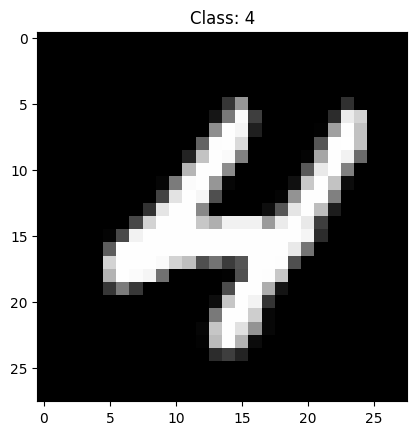

In [12]:
# Randomly checking the data
#  Menghasilkan indeks acak antara 0 dan jumlah total gambar dalam dataset `digits_data`
idx = np.random.randint(0, digits_data.shape[0])
# Menampilkan gambar dengan indeks yang dihasilkan secara acak menggunakan plt.imshow().
# Penggunaan cmap='gray' bertujuan untuk menampilkan gambar dalam skala warna abu-abu karena dataset MNIST berupa gambar grayscale.
plt.imshow(digits_data[idx], cmap='gray')
# Menampilkan judul plot yang berisi kelas atau label dari gambar yang dipilih secara acak
# Menggunakan str() untuk mengonversi label ke dalam string sebelum menambahkannya ke judul plot
plt.title('Class: ' + str(digits_labels[idx]))

<Axes: xlabel='Labels', ylabel='count'>

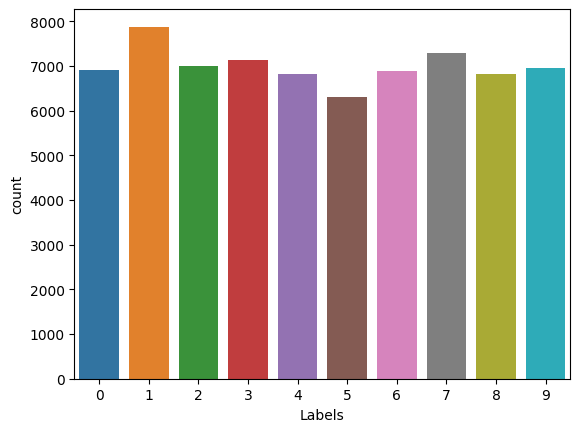

In [13]:
# Check data distribution
df_labels = pd.DataFrame(digits_labels, columns=['Labels'])
# Menggunakan sns.countplot(df_labels, x='Labels') akan menghasilkan plot batang (countplot) yang menampilkan
# distribusi frekuensi dari nilai-nilai pada kolom 'Labels' dalam DataFrame df_labels.
# Setiap batang pada plot akan merepresentasikan jumlah kemunculan setiap nilai label pada sumbu x.
# Dengan kata lain, ini memberikan gambaran visual tentang seberapa sering setiap nilai label muncul dalam dataset.
sns.countplot(df_labels, x='Labels')

## Load Kaggle A-Z

Dataset A-Z Handwritten Data adalah dataset yang berisi gambar tulisan tangan dari huruf A sampai Z. Setiap gambar menunjukkan satu huruf. Dataset ini dapat ditemukan di platform seperti Kaggle dan dapat digunakan untuk tugas-tugas pengenalan karakter atau OCR.

In [14]:
!wget https://iaexpert.academy/arquivos/alfabeto_A-Z.zip

--2023-12-05 15:02:10--  https://iaexpert.academy/arquivos/alfabeto_A-Z.zip
Resolving iaexpert.academy (iaexpert.academy)... 162.159.134.42
Connecting to iaexpert.academy (iaexpert.academy)|162.159.134.42|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 193643888 (185M) [application/zip]
Saving to: ‘alfabeto_A-Z.zip’

alfabeto_A-Z.zip    100%[===================>] 184.67M  87.0MB/s    in 2.1s    

2023-12-05 15:02:12 (87.0 MB/s) - ‘alfabeto_A-Z.zip’ saved [193643888/193643888]



In [15]:
# Extract zip file
# Membuka file zip dengan mode 'read' (mode='r')
zip_object = zipfile.ZipFile(file = 'alfabeto_A-Z.zip', mode = 'r')
# Mengekstrak semua file dalam objek zip ke dalam direktori yang ditentukan.
# Dalam hal ini, ./ menunjukkan bahwa file akan diekstrak ke dalam direktori saat ini.
zip_object.extractall('./')
# Menutup objek zip setelah proses ekstraksi selesai.
# Ini adalah langkah yang baik untuk memastikan bahwa semua sumber daya terkait dengan objek zip dibersihkan dan membebaskan memori setelah selesai digunakan.
zip_object.close()

In [16]:
# Menghubungkan Google Drive (pada lingkungan Colab)
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [17]:
# Menggunakan Pandas untuk membaca dataset dari file CSV yang bernama 'A_Z Handwritten Data.csv'.
# kemudian Mengonversi tipe data semua kolom dalam DataFrame menjadi float32. Hal ini dapat bermanfaat untuk efisiensi memori
# jika dataset berisi nilai numerik yang dapat direpresentasikan sebagai bilangan pecahan 32-bit.
dataset_az = pd.read_csv('A_Z Handwritten Data.csv').astype('float32')
# Menampilkan DataFrame dataset_az yang telah dibaca dan dikonversi tipenya
dataset_az

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372445,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372446,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372447,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372448,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
# Get pixel data only
alphabet_data = dataset_az.drop('0', axis=1)
# Get labels only
alphabet_labels = dataset_az['0']

In [19]:
# Check shape data
alphabet_data.shape, alphabet_labels.shape

((372450, 784), (372450,))

In [20]:
# Check shape labels
alphabet_labels.shape

(372450,)

In [21]:
# Reshape pixel data to 28*28
alphabet_data = np.reshape(alphabet_data.values, (alphabet_data.shape[0], 28, 28))
# Check the result by its shape
alphabet_data.shape

(372450, 28, 28)

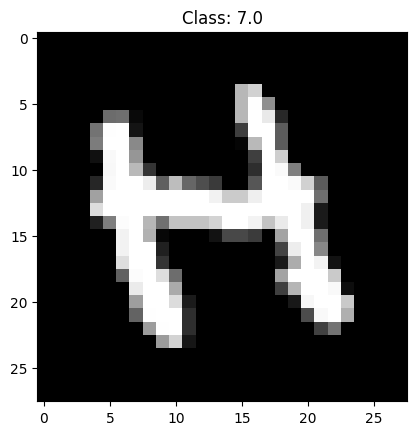

In [22]:
# Randomly checking A-Z dataset
index = np.random.randint(0, alphabet_data.shape[0])
plt.imshow(alphabet_data[index], cmap = 'gray')
plt.title('Class: ' + str(alphabet_labels[index]));

<Axes: xlabel='Labels', ylabel='count'>

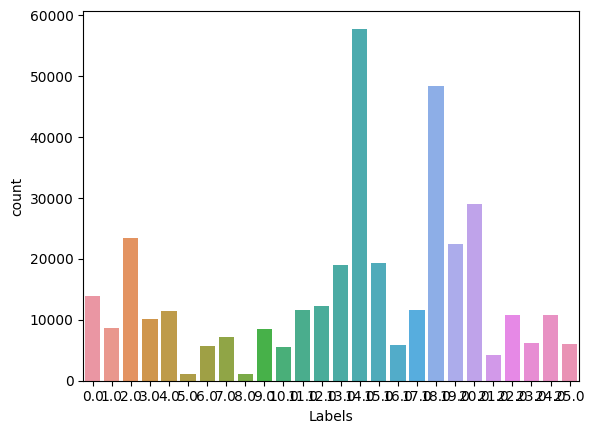

In [23]:
# Check data distribution
# Membuat DataFrame dari label-label (alphabet_labels) dengan satu kolom bernama 'Labels'
df_az_labels = pd.DataFrame({
    'Labels': alphabet_labels.values
})
# Menggunakan Seaborn untuk membuat plot distribusi label menggunakan countplot
# x='Labels' menunjukkan bahwa sumbu x akan berisi data dari kolom 'Labels' pada DataFrame
sns.countplot(df_az_labels, x='Labels')

## Combine Dataset (MNIST + Kaggel A-Z)

Langkah ini melibatkan menggabungkan dataset MNIST yang berisi gambar digit tulisan tangan dengan dataset Kaggle A-Z yang berisi gambar huruf tulisan tangan. Hasilnya adalah pembentukan satu dataset yang lebih besar dan lebih beragam. Tujuan dari langkah ini adalah untuk melatih model yang memiliki kekuatan dan keberagaman yang lebih baik dengan menggabungkan informasi dari dua dataset yang memiliki karakteristik berbeda.

In [24]:
# Check unique value from digits_labels
np.unique(digits_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [25]:
# Check unique value from alphabet_labels
np.unique(alphabet_labels)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.],
      dtype=float32)

In [26]:
# We already know that digits labels containt labels from 0-9 (10 labels)
# We also know that alphabet labels start from 0-25 which represent A-Z
# If we want to combine them, the A-Z labels should continuing the digits label

alphabet_labels += 10
# Menambahkan 10 ke setiap label pada alphabet_labels untuk melanjutkan dari 10 ke atas (untuk A-Z)

In [27]:
# cek kembali nilai alphabet_labels
np.unique(alphabet_labels)

array([10., 11., 12., 13., 14., 15., 16., 17., 18., 19., 20., 21., 22.,
       23., 24., 25., 26., 27., 28., 29., 30., 31., 32., 33., 34., 35.],
      dtype=float32)

In [28]:
# Combine both of them
#  Menggabungkan kedua dataset (alphabet_data dan digits_data)
data = np.vstack([alphabet_data, digits_data])
labels = np.hstack([alphabet_labels, digits_labels])

In [29]:
# Check the shape
# cek ukuran dari bentuk data
data.shape, labels.shape

((442450, 28, 28), (442450,))

In [30]:
# Check labels
# Cek nilai-nilai yang unik dari labels yang baru digabungkan
np.unique(labels)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35.], dtype=float32)

In [31]:
# Convert data to float32
data = np.array(data, dtype = 'float32')

In [32]:
# Since Convolutional need 3d data (including depth)
# and our images only in 2d data (because in grayscale format)
# we need to add "the depth" to the data
data = np.expand_dims(data, axis=-1)

# check shape  dari data setelah ditambah dimensi kedalaman
data.shape

(442450, 28, 28, 1)

# Preprocessing

Langkah ini mencakup berbagai teknik untuk menyiapkan data sebelum digunakan dalam model.

In [33]:
# Normalize data
# Membagi setiap nilai dalam variabel data dengan 255.0.
data /= 255.0

In [34]:
# Check range value of data
# mengecek rentang nilai dari elemen-elemen pada indeks pertama dari variabel 'data'.
data[0].min(), data[0].max()

(0.0, 1.0)

In [35]:
# Enconde the labels
# LabelBinarizer similar with OneHotEncoder
# Menggunakan LabelBinarizer untuk mengonversi label-label dalam variabel 'labels' menjadi bentuk biner.
# LabelBinarizer digunakan untuk mengubah kategori label menjadi representasi biner.
le = LabelBinarizer()
labels = le.fit_transform(labels)

In [36]:
# Check labels shape
# Menggunakan LabelBinarizer untuk mengonversi label-label dalam variabel 'labels' menjadi bentuk biner.
# LabelBinarizer digunakan untuk mengubah kategori label menjadi representasi biner.
labels.shape

(442450, 36)

Text(0.5, 1.0, '[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]')

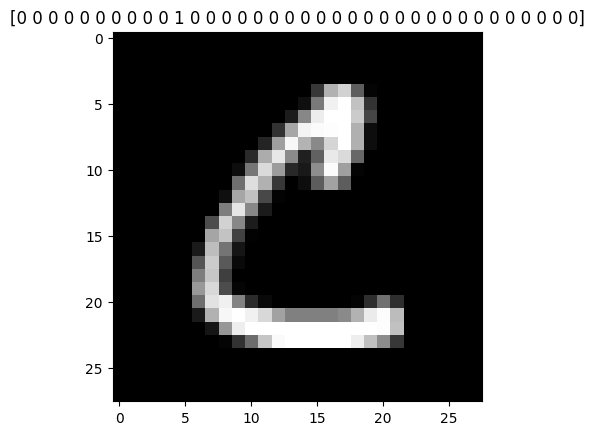

In [37]:
# Check data with label binarizer's label
plt.imshow(data[30000].reshape(28,28), cmap='gray')
plt.title(str(labels[0]))
# menampilkan gambar dari data pada indeks ke-30000 (asumsi data berbentuk
# gambar dengan dimensi 28x28) beserta label biner yang sesuai.

In [38]:
# Since our data is not balance, we will handle it by giving weight for 'small' data

# Check number of data for each labels first
classes_total = labels.sum(axis = 0)
classes_total
# menghitung jumlah data untuk setiap label pertama dengan menjumlahkan
# nilai-nilai pada setiap kolom dari variabel 'labels'.

array([ 6903,  7877,  6990,  7141,  6824,  6313,  6876,  7293,  6825,
        6958, 13869,  8668, 23409, 10134, 11440,  1163,  5762,  7218,
        1120,  8493,  5603, 11586, 12336, 19010, 57825, 19341,  5812,
       11566, 48419, 22495, 29008,  4182, 10784,  6272, 10859,  6076])

In [39]:
# Check the biggest value of data
classes_total.max()
# menampilkan nilai maksimum dari jumlah data pada satu label tertentu.

57825

In [40]:
# Create a weight for each data
classes_weights = {}
for i in range(0, len(classes_total)):
  #print(i)
  classes_weights[i] = classes_total.max() / classes_total[i]
# Membuat bobot untuk setiap data dengan melakukan iterasi pada setiap label dan menghitung bobotnya
# berdasarkan perbandingan jumlah data terbanyak dengan jumlah data pada setiap label.

# Check the weight for each data
classes_weights
# menampilkan bobot yang telah dihitung untuk setiap data.

{0: 8.376792698826597,
 1: 7.340992763742541,
 2: 8.272532188841202,
 3: 8.097605377398123,
 4: 8.473769050410317,
 5: 9.15967052114684,
 6: 8.409685863874346,
 7: 7.928835870012341,
 8: 8.472527472527473,
 9: 8.310577752227651,
 10: 4.169370538611291,
 11: 6.671089063221043,
 12: 2.4702037677816224,
 13: 5.7060390763765545,
 14: 5.0546328671328675,
 15: 49.72055030094583,
 16: 10.035577924331829,
 17: 8.011221945137157,
 18: 51.629464285714285,
 19: 6.808548216178029,
 20: 10.320364090665715,
 21: 4.990937338166753,
 22: 4.6875,
 23: 3.0418200946870066,
 24: 1.0,
 25: 2.989762680316426,
 26: 9.94924294562973,
 27: 4.999567698426422,
 28: 1.1942625828703608,
 29: 2.5705712380529007,
 30: 1.993415609487038,
 31: 13.827116212338593,
 32: 5.362110534124629,
 33: 9.21954719387755,
 34: 5.3250759738465785,
 35: 9.51695194206715}

### penjelasan

Proses normalisasi data dilakukan untuk mengubah rentang nilai setiap fitur data menjadi kisaran antara 0 hingga 1. Hal ini bertujuan untuk menyamakan skala nilai antar fitur, memudahkan model dalam memahami pola-pola dalam dataset. Sebagai contoh, normalisasi dapat mengubah intensitas piksel dalam gambar dari rentang 0 hingga 255 menjadi rentang 0 hingga 1, sesuai dengan kebutuhan pelatihan model.

Pada tahap encoding label, menggunakan Label Binarizer digunakan untuk mengonversi label kategori menjadi representasi biner. Hasilnya adalah matriks biner yang merepresentasikan setiap label dalam dataset. Matriks ini memiliki jumlah kolom sesuai dengan jumlah kelas atau label dalam dataset, dan setiap baris mewakili satu sampel data.

Tampilan gambar yang ditampilkan merupakan representasi visual dari dataset. Gambar tersebut berasosiasi dengan label biner tertentu, seperti [0, 1, 0]. Menampilkan gambar dengan label biner ini memungkinkan visualisasi data berdasarkan labelnya.

Pemberian bobot untuk setiap label bertujuan untuk menangani ketidakseimbangan data. Dengan memberikan bobot, model lebih fokus pada data yang jumlahnya lebih sedikit, memungkinkan pembelajaran yang lebih baik dari data yang kurang representatif.

Dengan demikian, hasil dari proses preprocessing mencakup normalisasi data, encoding label menggunakan Label Binarizer, tampilan visual dari dataset berdasarkan label biner, dan pemberian bobot untuk menangani ketidakseimbangan data. Ini bertujuan untuk mempersiapkan data dengan cara yang memungkinkan model untuk belajar dengan efektif.

# Split Data to Train and Test

membagi dataset menjadi data yang digunakan sebagai latihan oleh mesin dan data uji. Data latih digunakan untuk melatih model, sedangkan data uji digunakan untuk menguji kinerja model yang telah dilatih.

In [41]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size = 0.2, random_state = 1, stratify = labels)

## Create Data Augmentation

In [42]:
# Import library yang dibutuhkan untuk augmentasi data menggunakan ImageDataGenerator dari TensorFlow
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [43]:
# ImageDataGenerator menghasilkan data variasi baru dari data yang sudah ada dengan menerapkan transformasi khusus
# Transformasi tersebut dapat mencakup rotasi, zoom, pergeseran, dan flip horizontal, yang dapat diterapkan pada gambar.
augmentation = ImageDataGenerator(rotation_range = 10, zoom_range=0.05, width_shift_range=0.1,
                                  height_shift_range=0.1, horizontal_flip = False)

# Build CNN Model

In [44]:
# Import library

# import library yang dibutuhkan untuk membangun model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.callbacks import ModelCheckpoint

In [45]:
# Build the network
network = Sequential()

# Menambahkan layer konvolusi dengan 32 filter, kernel size 3x3, fungsi aktivasi ReLU, dan input shape 28x28x1
network.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
# Menambahkan layer max pooling dengan pool size 2x2
network.add(MaxPool2D(pool_size=(2,2)))

# Menambahkan layer konvolusi dengan 64 filter, kernel size 3x3, fungsi aktivasi ReLU, dan padding 'same'
network.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))
# Menambahkan layer max pooling dengan pool size 2x2
network.add(MaxPool2D(pool_size=(2,2)))

# Menambahkan layer konvolusi dengan 128 filter, kernel size 3x3, fungsi aktivasi ReLU, dan padding 'valid'
network.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='valid'))
# Menambahkan layer max pooling dengan pool size 2x2
network.add(MaxPool2D(pool_size=(2,2)))

# Meratakan output menjadi satu dimensi
network.add(Flatten())

# Menambahkan layer dense (fully connected) dengan 64 neuron dan fungsi aktivasi ReLU
network.add(Dense(64, activation='relu'))
# Menambahkan layer dense dengan 128 neuron dan fungsi aktivasi ReLU
network.add(Dense(128, activation='relu'))

# Menambahkan layer output dengan 36 neuron (sesuai jumlah kelas), menggunakan fungsi aktivasi softmax
network.add(Dense(36, activation='softmax'))

# Mengkompilasi model dengan categorical crossentropy loss, optimizer Adam, dan metrik akurasi
network.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [46]:
# Check network summary
# melihat ringkasan atau struktur dari model jaringan
network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 2, 2, 128)         0

In [47]:
# Membuat label untuk kelas-kelas yang akan diprediksi
name_labels = '0123456789'
# Menambahkan label huruf besar A-Z ke dalam string name_labels
name_labels += 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
# Membuat list name_labels yang berisi karakter-karakter dari string name_labels
name_labels = [l for l in name_labels]

# Menampilkan label yang sebenarnya
print(name_labels)


['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


## Train model

In [48]:
# Set model name, epoch, and batch size
file_model = 'custom_ocr.model'
epochs = 20
batch_size = 128

In [49]:
# Setup checkpoint
# Mengatur callback ModelCheckpoint untuk menyimpan model dengan performa terbaik selama pelatihan
checkpointer = ModelCheckpoint(file_model, monitor = 'val_loss', verbose = 1, save_best_only=True)

In [50]:
# Fit the model
history = network.fit(
    # Menggunakan augmented data dari generator dengan ukuran batch yang ditentukan
    augmentation.flow(X_train, y_train, batch_size=batch_size),
    # Data validasi yang tidak di-augmentasi
    validation_data=(X_test, y_test),
    # Menentukan jumlah langkah per epoch
    steps_per_epoch=len(X_train) // batch_size,
    # Jumlah epoch yang diinginkan
    epochs=epochs,
    # Menentukan bobot kelas untuk penanganan ketidakseimbangan
    class_weight=classes_weights,
    # Tampilkan informasi pelatihan secara detail
    verbose=1,
    # Menggunakan callback untuk menyimpan model terbaik
    callbacks=[checkpointer]
)


Epoch 1/20
2765/2765 [==============================] - ETA: 0s - loss: 2.1906 - accuracy: 0.8255
Epoch 1: val_loss improved from inf to 0.29643, saving model to custom_ocr.model
2765/2765 [==============================] - 144s 48ms/step - loss: 2.1906 - accuracy: 0.8255 - val_loss: 0.2964 - val_accuracy: 0.8820
Epoch 2/20
2765/2765 [==============================] - ETA: 0s - loss: 0.9953 - accuracy: 0.9003
Epoch 2: val_loss improved from 0.29643 to 0.29305, saving model to custom_ocr.model
2765/2765 [==============================] - 137s 49ms/step - loss: 0.9953 - accuracy: 0.9003 - val_loss: 0.2930 - val_accuracy: 0.8787
Epoch 3/20
2765/2765 [==============================] - ETA: 0s - loss: 0.8279 - accuracy: 0.9127
Epoch 3: val_loss improved from 0.29305 to 0.18635, saving model to custom_ocr.model
2765/2765 [==============================] - 127s 46ms/step - loss: 0.8279 - accuracy: 0.9127 - val_loss: 0.1863 - val_accuracy: 0.9277
Epoch 4/20
2764/2765 [=========================

### penjelasan

Hasil dari langkah ini adalah melatih model jaringan saraf dengan menerapkan augmentasi data pada dataset pelatihan. Teknik augmentasi data memungkinkan dataset asli diperkaya dengan variasi tambahan, seperti rotasi, pergeseran, dan perbesaran gambar, yang diterapkan secara dinamis selama proses pelatihan. Data latih mengalir melalui langkah-langkah (batches) yang dibentuk oleh aliran data augmentasi.

Selama proses pelatihan, model diperbarui berulang kali melalui jumlah epoch yang telah ditentukan. Setiap epoch melibatkan iterasi melalui seluruh dataset latih. Penggunaan bobot kelas memberikan kesadaran tambahan kepada model terhadap kelas-kelas yang jumlahnya lebih sedikit dalam dataset, membantu model fokus pada kelas-kelas yang kurang representatif.

Hasil akhir pelatihan dapat dilihat melalui objek history yang terbentuk. Objek ini berisi metrik seperti akurasi atau kehilangan (loss) yang terakumulasi selama proses pelatihan model. Analisis objek history memungkinkan evaluasi performa dan pembelajaran model pada setiap iterasi pelatihan.

Secara keseluruhan, proses ini melibatkan pelatihan model jaringan saraf dengan memanfaatkan augmentasi data untuk memperluas variasi dataset, penggunaan bobot kelas untuk penekanan pada kelas-kelas minor, dan pemantauan serta evaluasi pelatihan model menggunakan callback yang mengamati performa selama proses pelatihan.

# Evaluate Model

## Make a Single Prediction

In [51]:
# make a prediction
# Melakukan prediksi menggunakan model neural network terhadap data uji (X_test)
# network.predict() digunakan untuk membuat prediksi
# batch_size=batch_size menunjukkan ukuran batch yang digunakan saat melakukan prediksi
predictions = network.predict(X_test, batch_size=batch_size)

692/692 [==============================] - 2s 2ms/step


In [52]:
# Menampilkan prediksi dari model untuk data dengan indeks ke-1 dari data uji (X_test)
# predictions[1] digunakan untuk mengakses prediksi untuk data dengan indeks ke-1
# Ini akan menampilkan probabilitas untuk setiap label
predictions[1]

array([9.1699583e-23, 2.1131981e-13, 1.1721504e-12, 5.0334689e-16,
       6.6577404e-16, 8.7641572e-10, 1.0867048e-17, 9.3088963e-15,
       1.8577864e-17, 2.2050078e-16, 2.5664092e-21, 6.4956146e-13,
       1.7794159e-10, 3.1957570e-10, 5.3715877e-12, 6.2311973e-16,
       1.1790116e-12, 3.8451311e-15, 9.9977702e-01, 2.2281685e-04,
       3.0688550e-17, 6.1187611e-11, 1.4345570e-17, 2.0789177e-16,
       4.1000653e-12, 1.8693824e-16, 4.0397816e-19, 8.0360369e-24,
       8.0052440e-12, 7.2096874e-08, 4.2807351e-11, 2.2287700e-17,
       5.2583581e-15, 1.3026027e-15, 8.2684574e-11, 1.5270026e-09],
      dtype=float32)

In [53]:
# Get the actual prediction -> highest probability
np.argmax(predictions[1])

18

In [54]:
# Check label for 24
name_labels[18]

'I'

In [55]:
# Check y_test label for 0
y_test[1]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [56]:
# check the highest value
# Mencari indeks nilai tertinggi dari vektor label y_test pada indeks ke-1
np.argmax(y_test[1])

18

In [57]:
# Check the label of y_test 0
# Mencari label dari nilai tertinggi dalam vektor label y_test pada indeks ke-18
name_labels[np.argmax(y_test[18])]

'S'

## Make an Evaluation on Test Data

In [58]:
# Mengevaluasi model neural network menggunakan data uji (X_test dan y_test)
network.evaluate(X_test, y_test)

2766/2766 [==============================] - 9s 3ms/step - loss: 0.1522 - accuracy: 0.9475


[0.15220443904399872, 0.9474517107009888]

In [59]:
# Print Classification Report
print(classification_report(y_test.argmax(axis=1), predictions.argmax(axis=1), target_names = name_labels))

              precision    recall  f1-score   support

           0       0.33      0.57      0.42      1381
           1       0.98      0.98      0.98      1575
           2       0.89      0.98      0.93      1398
           3       0.98      0.98      0.98      1428
           4       0.94      0.97      0.95      1365
           5       0.59      0.95      0.73      1263
           6       0.97      0.97      0.97      1375
           7       0.97      0.99      0.98      1459
           8       0.98      0.98      0.98      1365
           9       0.98      0.98      0.98      1392
           A       0.99      0.99      0.99      2774
           B       0.99      0.98      0.99      1734
           C       0.98      0.99      0.98      4682
           D       0.90      0.98      0.94      2027
           E       0.99      0.98      0.99      2288
           F       0.95      1.00      0.98       233
           G       0.93      0.97      0.95      1152
           H       0.98    

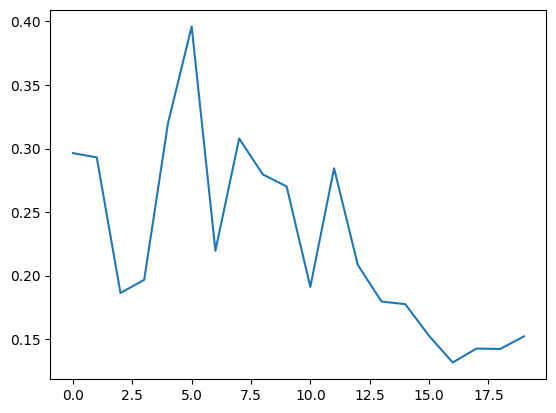

In [60]:
# Menggunakan matplotlib untuk membuat plot nilai loss pada set data validasi
# ('val_loss') untuk setiap epoch
plt.plot(history.history['val_loss'])

In [61]:
# Melihat kunci-kunci (keys) yang tersedia dalam variabel history.history
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

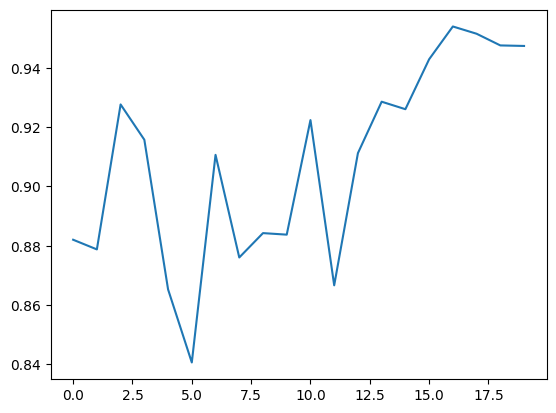

In [62]:
# Memvisualisasikan metrik 'val_accuracy' (akurasi pada set data validasi) dari
# hasil pelatihan model
plt.plot(history.history['val_accuracy'])

# Save The Model

In [63]:
# The result will show in colab directory
network.save('network', save_format= 'h5')
# Menyimpan model yang telah dilatih dalam format h5 dengan nama 'network'

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Testing on Real Image

In [64]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [65]:
# Import library
from tensorflow.keras.models import load_model

In [66]:
# Load saved network
# Memuat kembali jaringan yang telah disimpan sebelumnya
load_network = load_model('network')

In [67]:
# Check summary
# Menampilkan ringkasan atau struktur dari model yang dimuat kembali
load_network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 2, 2, 128)         0

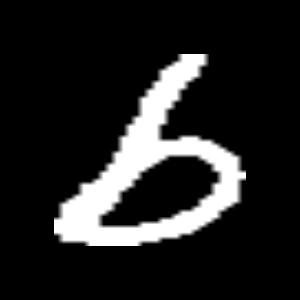

In [68]:
# Load Image
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/drive/MyDrive/ML/b_small.jpg')
cv2_imshow(img)

In [69]:
# Check shape
img.shape

(300, 300, 3)

In [70]:
# Convert to gray
# Mengonversi gambar ke skala abu-abu (grayscale)
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# check shape
gray_img.shape

(300, 300)

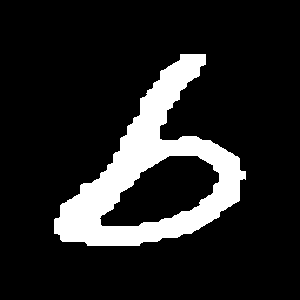

120.0


In [71]:
# Pre-process
# Binary Threshold and Otsu
value, thresh = cv2.threshold(gray_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

cv2_imshow(thresh)

# print threshold value
print(value)

In [72]:
# Resize image in order to match network input shape -> 28*28
img_resize = cv2.resize(gray_img, (28,28))
cv2_imshow(img_resize)

In [73]:
# Convert to float 32
# and extend the dimension since network input shape is 28*28*1
img_input = img_resize.astype('float32') / 255 # also perform normalization
img_input = np.expand_dims(img_input, axis=-1) # insert depth

# check shape
img_input.shape

(28, 28, 1)

In [74]:
# Add "amount of data" as dimension
img_input = np.reshape(img_input, (1,28,28,1))
img_input.shape

(1, 28, 28, 1)

In [75]:
# Make a predition
prediction = load_network.predict(img_input)
pred_label = np.argmax(prediction) # predict actual label
pred_label

1/1 [==============================] - 0s 156ms/step


6

In [76]:
# check label for 6
name_labels[6]

'6'

### Kesimpulan

1. Kinerja Model CNN: Model yang dikembangkan mampu dengan baik dalam mengenali karakter huruf dan angka. Hasil evaluasi pada data uji menunjukkan tingkat akurasi yang tinggi, menandakan kemampuan model dalam menggeneralisasi pada data yang tidak terlibat dalam pelatihan.

2. Evaluasi Performa Model: Performa model dievaluasi menggunakan berbagai metrik seperti precision, recall, dan f1-score. Hasil evaluasi menunjukkan kinerja yang memuaskan dan konsisten, menegaskan kemampuan model dalam mengenali karakter dengan tepat dan komprehensif.

3. Penggunaan Teknik Augmentasi Data: Penerapan teknik augmentasi data, seperti rotasi, pergeseran, dan zoom, memberikan kontribusi signifikan terhadap peningkatan kualitas model. Dengan memperkenalkan variasi pada dataset, model dapat mengenali karakter dalam situasi yang lebih beragam.

4. Penanganan Ketidakseimbangan Kelas: Strategi untuk menangani ketidakseimbangan jumlah sampel antar kelas juga memberikan dampak positif. Dengan memberikan penekanan lebih pada kelas yang kurang representatif, model mampu belajar dengan lebih baik dari kelas yang memiliki sampel yang lebih sedikit.

5. Kemampuan untuk Disimpan dan Dimuat Ulang: Model yang telah dilatih dapat disimpan dan dimuat ulang dengan mudah untuk penggunaan di masa mendatang. Kemampuan ini memungkinkan model untuk diterapkan pada berbagai aplikasi pengenalan karakter, seperti dalam pengenalan plat nomor kendaraan, pengenalan tulisan tangan, dan skenario lain yang memerlukan pengenalan karakter dalam citra atau gambar.

